# Random forest algrothem

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
from sklearn.datasets import load_digits
digit=load_digits()

In [10]:
digit.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [13]:
dir(digit)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 432x288 with 0 Axes>

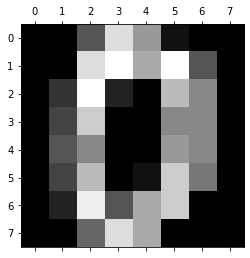

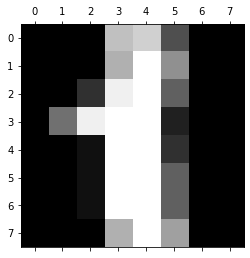

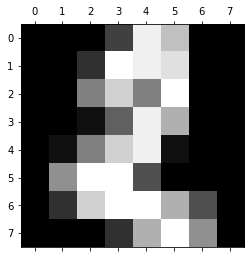

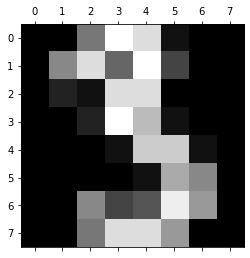

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.gray() 
for i in range(4):
    plt.matshow(digit.images[i]) 

In [14]:
digit.target

array([0, 1, 2, ..., 8, 9, 8])

In [15]:
df=pd.DataFrame(digit.data)

In [17]:
df
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [18]:
df["target"]=digit.target

In [19]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [24]:
x=df.drop("target",axis=1)  # independent

In [25]:
y=df["target"]    # dependent

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [35]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=50)      # we use n_estimer to improve the score   u can also check
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [36]:
model.score(x_test,y_test)

0.9833333333333333

In [37]:
y_pred=model.predict(x_test)
y_pred

array([9, 4, 1, 0, 4, 2, 4, 8, 3, 8, 1, 2, 8, 5, 6, 5, 9, 5, 1, 8, 3, 5,
       9, 4, 3, 0, 6, 0, 0, 0, 7, 5, 2, 1, 2, 6, 6, 7, 6, 0, 0, 2, 4, 7,
       5, 7, 8, 6, 2, 4, 5, 7, 6, 3, 7, 1, 2, 8, 1, 7, 4, 8, 1, 3, 0, 3,
       4, 7, 5, 6, 2, 9, 5, 8, 1, 7, 0, 7, 7, 7, 9, 5, 5, 0, 9, 5, 6, 0,
       1, 0, 0, 5, 8, 7, 3, 5, 7, 6, 9, 8, 8, 7, 4, 5, 9, 2, 0, 9, 6, 6,
       3, 3, 7, 1, 1, 1, 8, 9, 1, 2, 2, 8, 0, 3, 3, 0, 8, 0, 5, 0, 6, 3,
       2, 0, 3, 4, 9, 0, 3, 4, 6, 4, 5, 8, 9, 6, 6, 6, 1, 5, 4, 1, 4, 8,
       2, 3, 4, 8, 4, 0, 1, 3, 4, 7, 9, 4, 3, 5, 2, 3, 9, 8, 5, 4, 1, 1,
       5, 2, 1, 1, 1, 4, 2, 2, 2, 5, 3, 7, 6, 7, 4, 5, 2, 6, 0, 6, 9, 2,
       7, 2, 0, 2, 3, 3, 4, 0, 4, 2, 8, 6, 2, 6, 0, 0, 6, 2, 2, 6, 2, 2,
       4, 8, 7, 4, 6, 5, 4, 6, 7, 3, 8, 2, 1, 6, 6, 4, 0, 1, 0, 8, 7, 1,
       0, 6, 4, 1, 4, 3, 9, 6, 7, 3, 3, 5, 1, 8, 8, 0, 7, 2, 2, 7, 3, 5,
       6, 5, 8, 8, 8, 4, 7, 1, 6, 3, 2, 9, 4, 5, 2, 1, 6, 8, 3, 1, 8, 5,
       6, 7, 7, 5, 4, 0, 6, 5, 9, 4, 8, 7, 3, 1, 4,

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[34,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 40,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 30,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 43,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 36,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 37,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 33,  0],
       [ 0,  0,  0,  1,  0,  2,  0,  0,  0, 24]], dtype=int64)

Text(69.0, 0.5, 'Truth')

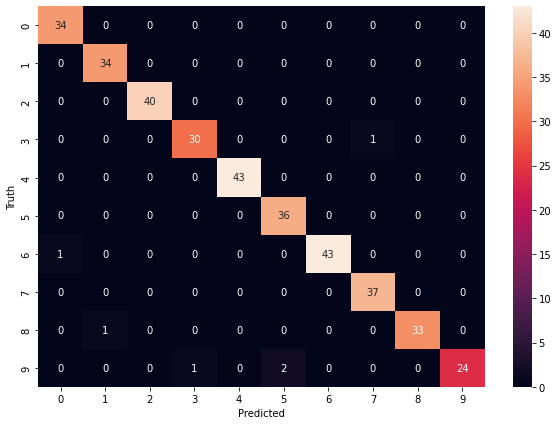

In [40]:
%matplotlib inline              # help us to see the corrct prediction
import matplotlib.pyplot as plt             # except dignoal if there is one it means wrong predict
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')